## Heatmap Data Generation and Visualization

Library Initialization

In [262]:
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Simulation Parameters

In [263]:
# Stud Dimensions (Standard)
stud_length_2x4 = 4
stud_length_2x6 = 6

In [264]:
# Wall dimensions (inches)
length = 72
width = 120

# Studs detected and its length (0 = 2x4, 1 = 2x6)
num_studs = 40
stud_type = 1
stud_length = stud_length_2x4

if(stud_type):
    stud_length = stud_length_2x6

# Heatmap data range
min_detect = 0
max_detect = 1
range_resolution = 0
prob_increase = 0.25

Array Initialization

In [265]:
# Initialize an empty Numpy array
data = np.zeros([width,length], dtype=float)

Range values of wall

In [266]:
x_values = list(range(length))
y_values = list(range(width))

Data generation of 4 studs

In [267]:
# Random number generate num_studs (x,y) coordinates with a z standard stud length
for x in range(num_studs):
    temp_x = random.choice(x_values)
    temp_y = random.choice(y_values)

    # If there is an overlap
    if(data[temp_y, temp_x] > 0):
        if(data[temp_y, temp_x] < 1):
            data[:, temp_x]= (data[temp_y,temp_x] * prob_increase) + data[temp_y,temp_x]

    else:
        data[:, temp_x] = 0.5
   
    # Expand the 4 coordinates by (x+1,y) of 3 iterations (2x4 stud dimension)
    for y in range(1,4,1):
        if(temp_x+y < length):
            
            if(data[temp_y, temp_x+y] < 1 and data[temp_y, temp_x+y] > 0):
                data[:, temp_x+y] = (data[temp_y,temp_x+y] * prob_increase) + data[temp_y,temp_x+y]
                continue

            data[:, temp_x+y] = 0.5

Further refinement of stud output

In [268]:
# Floors any values bigger than 1 
data[data > 1] = 1

# If the user only wants to see studs with a high probability
if(range_resolution):
    data[data < min_detect] = 0

Convert to Pandas Dataframe 

In [269]:
df = pd.DataFrame(data, columns=x_values, index=y_values)

Display Heatmap

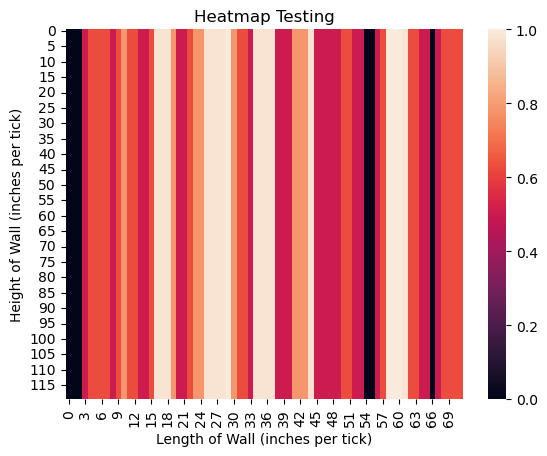

In [270]:
heat = sns.heatmap(df, vmax=1)
heat.axes.set_xlabel("Length of Wall (inches per tick)")
heat.axes.set_ylabel("Height of Wall (inches per tick)")
heat.axes.set_title("Heatmap Testing")
plt.show()